In [1]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# packages for the model

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score , recall_score , precision_score 

In [2]:
# importing the datasets

train_df = pd.read_csv(r"D:\2 . Data Science\My Studies\ML\Logistic Regression Projects\Titanic - ML Prediction\train.csv")
test_df = pd.read_csv(r"D:\2 . Data Science\My Studies\ML\Logistic Regression Projects\Titanic - ML Prediction\test.csv")

In [3]:
# Checking the Y variable distribution for imbalance 

<Axes: ylabel='Frequency'>

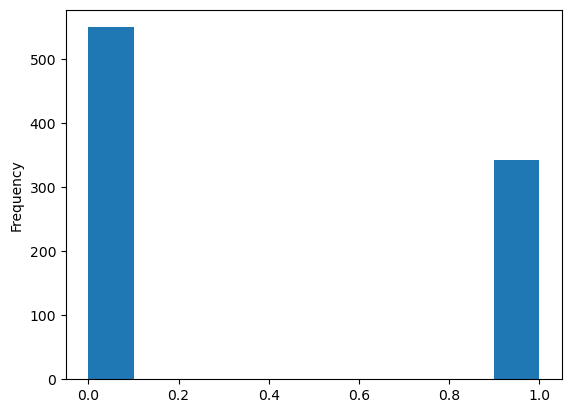

In [4]:
train_df['Survived'].plot(kind = 'hist' )

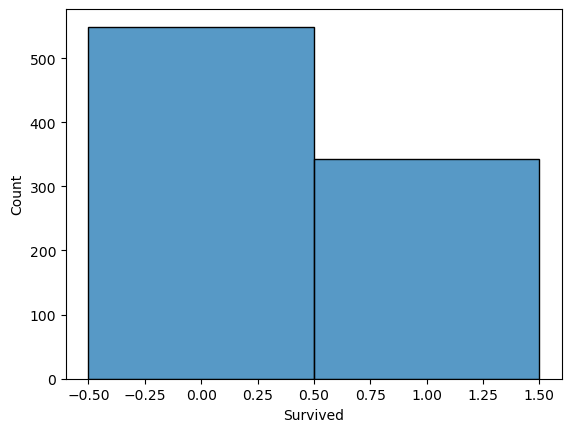

In [5]:
sns.histplot(data = train_df.Survived , discrete = True) 
plt.show()

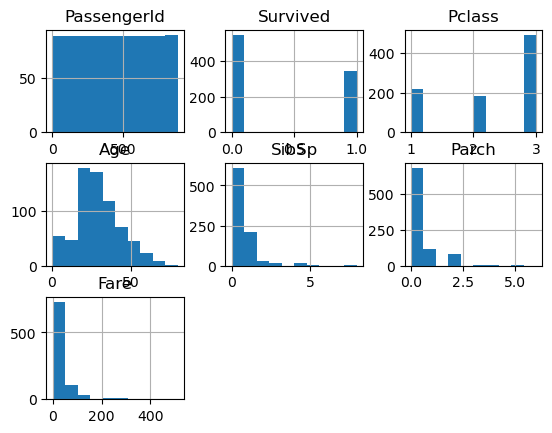

In [6]:
train_df.select_dtypes('number').hist()
plt.show()


In [7]:
# shape of train data
train_df.shape

(891, 12)

In [8]:
# checking for duplicates
train_df.duplicated().sum()

0

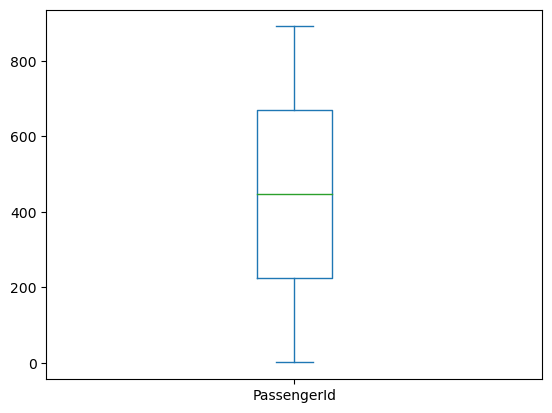

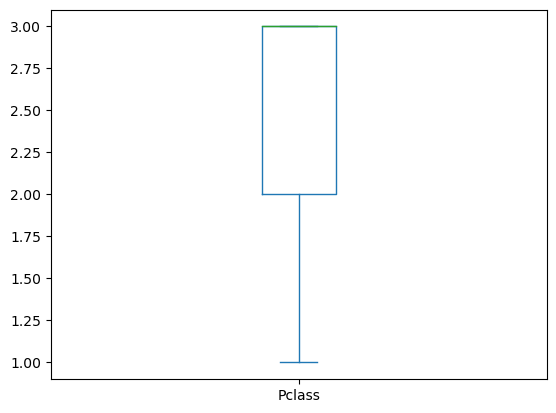

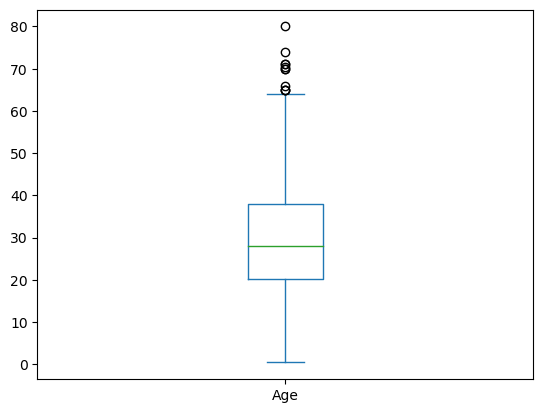

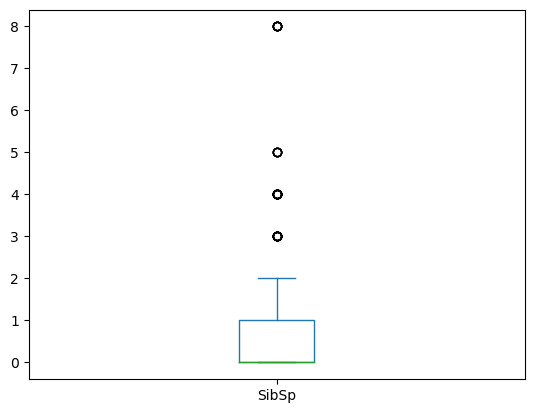

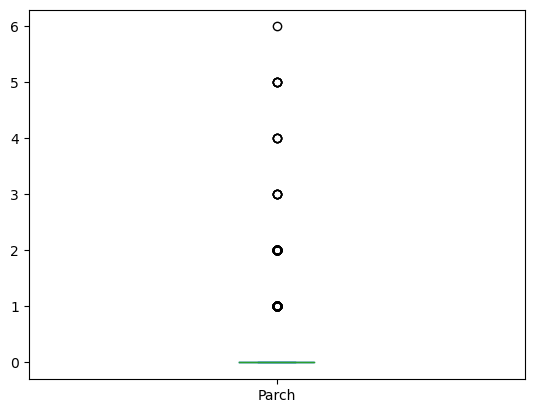

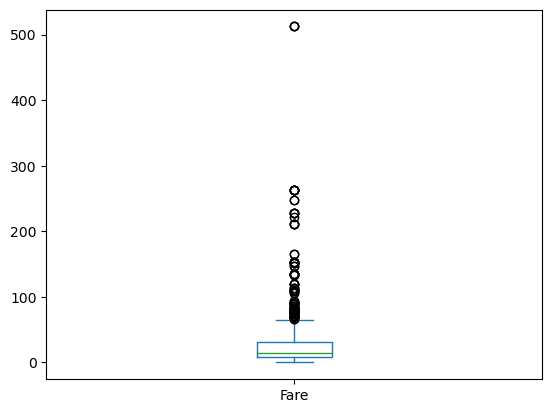

In [9]:
#checking for outliers 

for m in train_df.select_dtypes('number').drop(columns = 'Survived').columns:
    train_df[m].plot(kind = 'box')
    plt.show()

In [10]:
# taking care of outliers

for m in train_df.select_dtypes('number').drop(columns = ['Survived' , 'PassengerId']).columns:
    loww = train_df[m].quantile(0.05)
    upp = train_df[m].quantile(0.95)
    train_df[m].clip(lower = loww , upper = upp , inplace=True)
    test_df[m].clip(lower = loww , upper = upp , inplace=True)


In [11]:
#checking for missing values
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# taking care of missing values

train_df['Age'].fillna(round(train_df['Age'].mean()) , inplace = True)
test_df['Age'].fillna(round(train_df['Age'].mean()) , inplace = True)

test_df['Fare'].fillna(round(train_df['Fare'].mean()) , inplace = True)

train_df['Embarked'].fillna(train_df['Embarked'].mode()[0] , inplace = True)

train_df['Cabin'].ffill(inplace = True)
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0] , inplace = True)

test_df['Cabin'].ffill(inplace = True)
test_df['Cabin'].fillna(test_df['Cabin'].mode()[0] , inplace = True)

In [14]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## For Feature Selection

In [16]:
# 1. checking the relationships of y variable with X Varibales  ( which varibales are having an impact on our y varible)

In [17]:
train_df.select_dtypes('number').groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,29.947177,0.444444,0.282332,20.674641
1,444.368421,1.950292,28.399123,0.464912,0.447368,39.388059


PassengerId vs Survived 


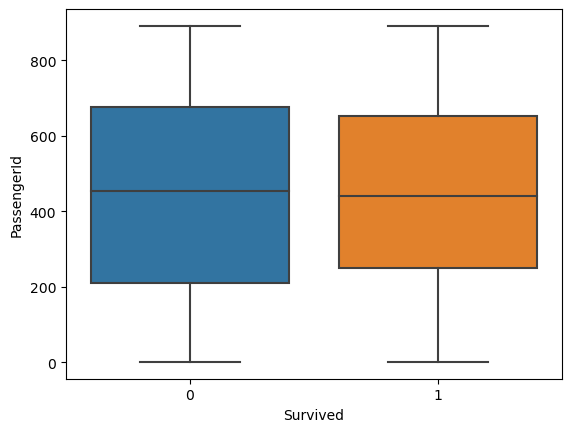

Pclass vs Survived 


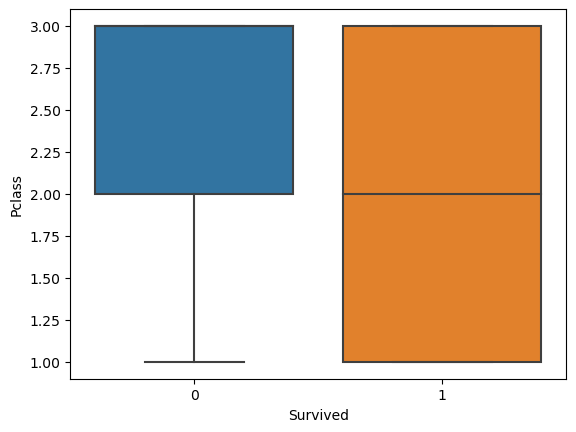

Age vs Survived 


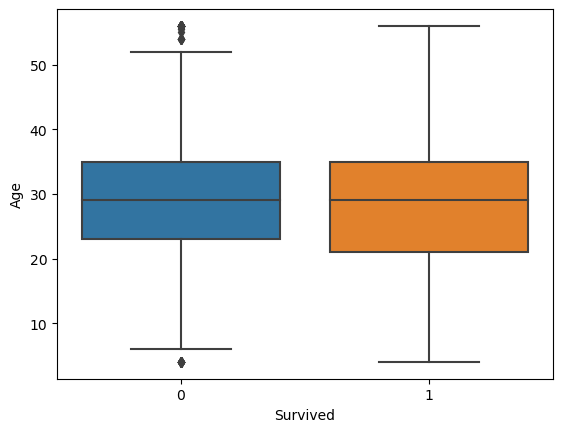

SibSp vs Survived 


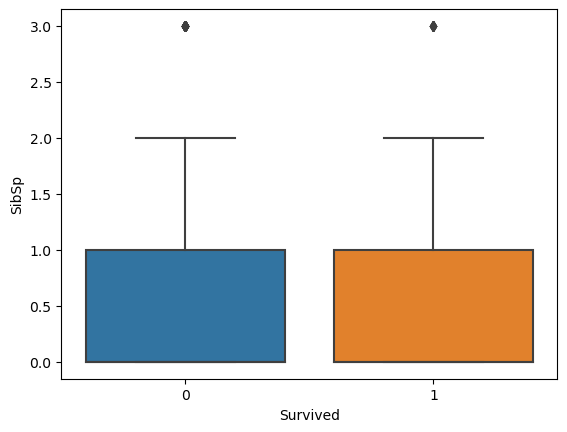

Parch vs Survived 


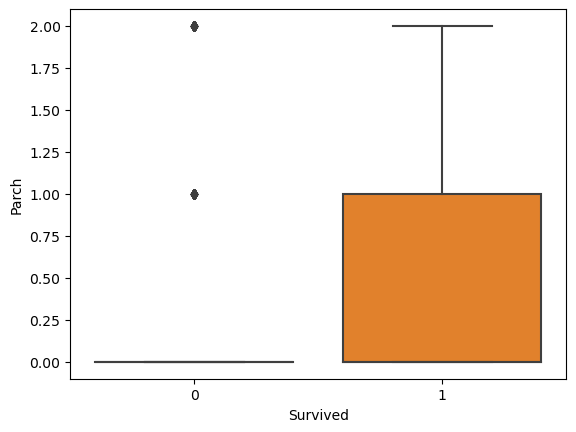

Fare vs Survived 


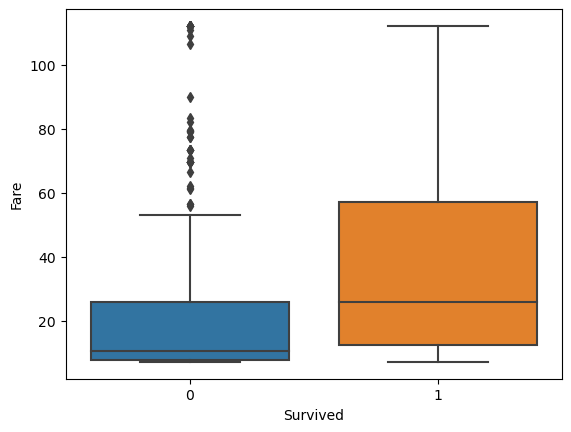

PassengerId    None
Pclass         None
Age            None
SibSp          None
Parch          None
Fare           None
dtype: object

In [18]:
def plot1(x):
    print(f"{x.name} vs Survived ")
    sns.boxplot(x = train_df.Survived ,  y = x )
    plt.show()
train_df.select_dtypes('number').drop(columns = 'Survived').apply(plot1)

In [19]:
# Pclass , Parch , Fare

In [20]:
features = ['Pclass' , 'Parch' ,'Fare']

In [21]:
# 2. Multicolinearity

# correlation

<Axes: >

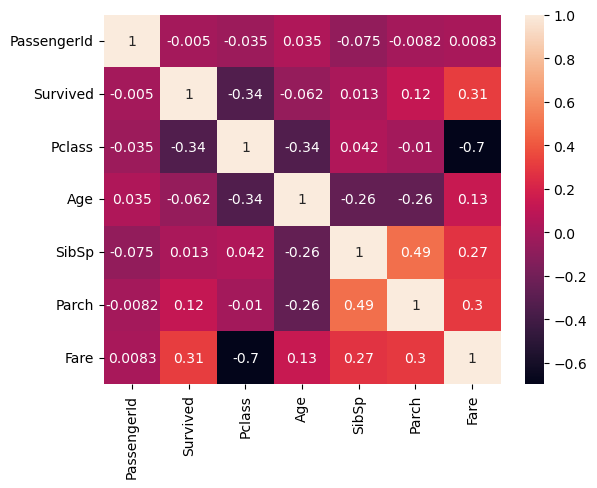

In [22]:
sns.heatmap(train_df.select_dtypes('number').corr() , annot = True)

In [23]:
train_df.Cabin.nunique()

147

## Building the model

In [24]:
# model1 

features1 = ['Pclass' , 'Parch' , 'Sex' , 'Embarked']

In [25]:
train_df.drop(columns= ['Name' , 'PassengerId' , 'Ticket' , 'Cabin'] ,inplace=True)
test_df.drop(columns= ['Name' , 'PassengerId' , 'Ticket' , 'Cabin'] ,inplace=True)

In [26]:
train_df = pd.get_dummies(train_df , drop_first= True)
test_df = pd.get_dummies(test_df , drop_first= True)

'+'.join(train_df.columns)

'Survived+Pclass+Age+SibSp+Parch+Fare+Sex_male+Embarked_Q+Embarked_S'

In [30]:
formula1 = 'Survived ~ Pclass+Age+SibSp+Parch+Fare+Sex_male+Embarked_Q+Embarked_S'

model2  = smf.logit(formula1 , train_df).fit()

Optimization terminated successfully.
         Current function value: 0.443219
         Iterations 6


In [31]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 Jan 2024   Pseudo R-squ.:                  0.3344
Time:                        10:03:09   Log-Likelihood:                -394.91
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 8.888e-81
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.2701      0.647      8.149      0.000       4.003       6.538
Sex_male[T.True]      -2.7081      0.200    -13.512      0.000      -3.101      -2.315
Embarked_Q[T.True]    -0.0293      0.382     -0.077      0.939      -0.777       0.719
Embarked_S[T.True]    -0.4223      0.238     -1.778      0.075      -0.888       0.043
Pclass                -1.0956      0.167     -6.571      0.000      -1.422      -0.769
Age                   -0.0419      0.008     -4.977      0.000      -0.058      -0.025
SibSp                 -0.3716      0.137     -2.709      0.007      -0.640      -0.103
Parch                 -0.0693      0.161     -0.431      0.667      -0.384       0.246
Fare                   0.0037      0.005      0.723      0.470      -0.006       0.014
======================================================================================
"""

In [37]:
cutoff = 0.346939
train_df['pred'] =  np.where(model2.predict() > cutoff , 1 , 0 ) 


In [38]:
# Model Validation

print('roc_auc_score = ' , roc_auc_score(train_df.Survived , model2.predict()))

print('accuracy_score' , accuracy_score(train_df.Survived , train_df.pred))
print('confusion_matrix', confusion_matrix(train_df.Survived , train_df.pred))
print('recall_score', recall_score(train_df.Survived , train_df.pred))
print('precision_score', precision_score(train_df.Survived , train_df.pred))

roc_auc_score =  0.8571698675955218
accuracy_score 0.7856341189674523
confusion_matrix [[429 120]
 [ 71 271]]
recall_score 0.7923976608187134
precision_score 0.6930946291560103


In [35]:

roc_df = pd.DataFrame()
for cutoff in np.linspace(0,1,50):
    train_df['pred']  = np.where(model2.predict() > cutoff , 1 , 0 )
    
    TP = np.where((train_df['pred'] == 1) & (train_df.Survived == 1)  , 1 , 0)
    FP = np.where((train_df['pred'] == 1) & (train_df.Survived == 0)  , 1 , 0)
    TN = np.where((train_df['pred'] == 0) & (train_df.Survived == 0)  , 1 , 0)
    FN = np.where((train_df['pred'] == 0) & (train_df.Survived == 1)  , 1 , 0)
    
    
    sensitivity  = TP.sum()/(TP.sum()+FN.sum())
    specificity  = TN.sum()/(TN.sum()+FP.sum())
    total = sensitivity + specificity
    temp_df = pd.DataFrame([cutoff , sensitivity , specificity  , total ]).T
    roc_df = pd.concat([roc_df , temp_df] , axis  =0 )
roc_df.columns  =  ['cutoff', 'sensitivity', 'specificity' , 'total']


In [36]:
roc_df.sort_values(by  = 'total'  , ascending= False)

,cutoff,sensitivity,specificity,total
0,0.346939,0.792398,0.781421,1.573818
0,0.571429,0.675439,0.897996,1.573435
0,0.551020,0.687135,0.885246,1.572380
0,0.591837,0.657895,0.914390,1.572285
0,0.387755,0.763158,0.806922,1.570080
0,0.489796,0.716374,0.852459,1.568833
0,0.530612,0.690058,0.877960,1.568018
0,0.408163,0.754386,0.810565,1.564951
0,0.428571,0.745614,0.816029,1.561643
0,0.510204,0.695906,0.865209,1.561116


In [41]:
# Test Predictions

cutoff = 0.346939
test_df['pred'] =  np.where(model2.predict(test_df) > cutoff , 1 , 0 ) 
